In [20]:
"""! pip install numpy
! pip install pandas 
! pip install -U scikit-learn 
! pip install matplotlib
! pip install seaborn
! pip install pickle4"""


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for pickle4: started
  Running setup.py install for pickle4: finished with status 'done'


  DEPRECATION: pickle4 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score

In [13]:
train_data_path = "C:\Python_Projects\FinTwin_project\data\CombinedData.csv"
test_data_path = "C:\Python_Projects\FinTwin_project\data\CombinedTestData.csv"
train_Data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_Data.head()

,EducationCode,IndustryCode,StatusCode,HomeownershipStatus,TypeOfResidence,NumberOfDependents,LAT,LONG
0,3,0,1,1,2,0,-65.716483,16.516738
1,1,20,1,1,2,7,23.529266,-21.353559
2,0,15,3,0,0,3,-37.576445,114.790745
3,0,20,1,0,1,4,47.918762,110.907109
4,2,0,3,0,1,9,80.731634,-56.356226


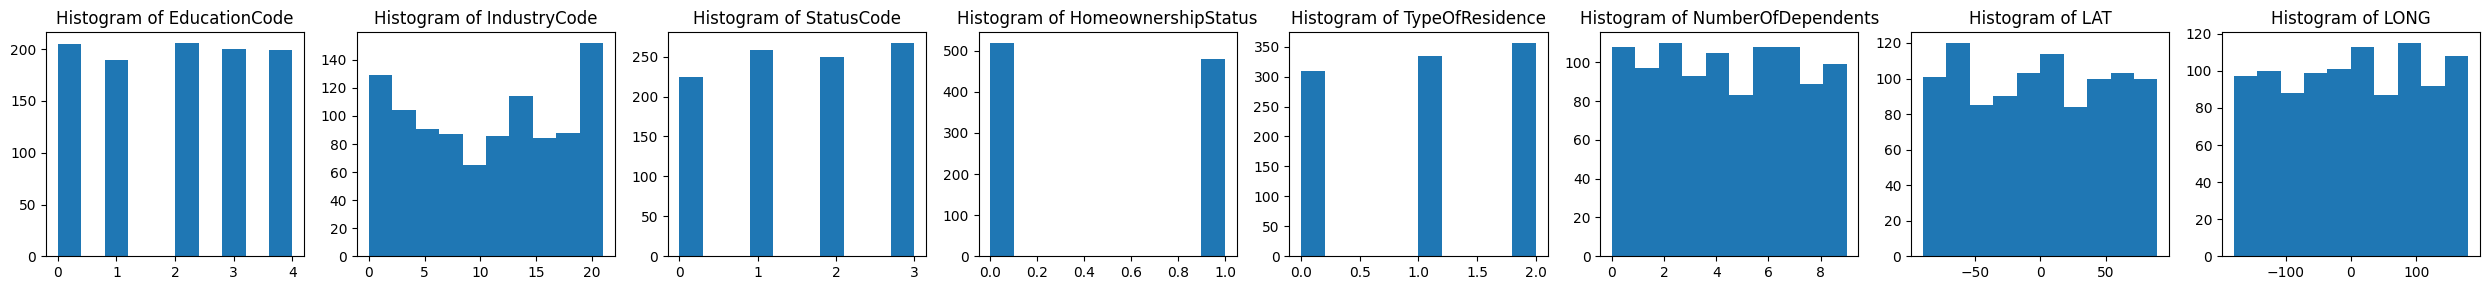

In [14]:
fig, axes = plt.subplots(1, train_Data.shape[1], figsize = (25, 3))

for plot_index, column in enumerate(train_Data.columns):
    axes[plot_index].hist(train_Data[column])
    axes[plot_index].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

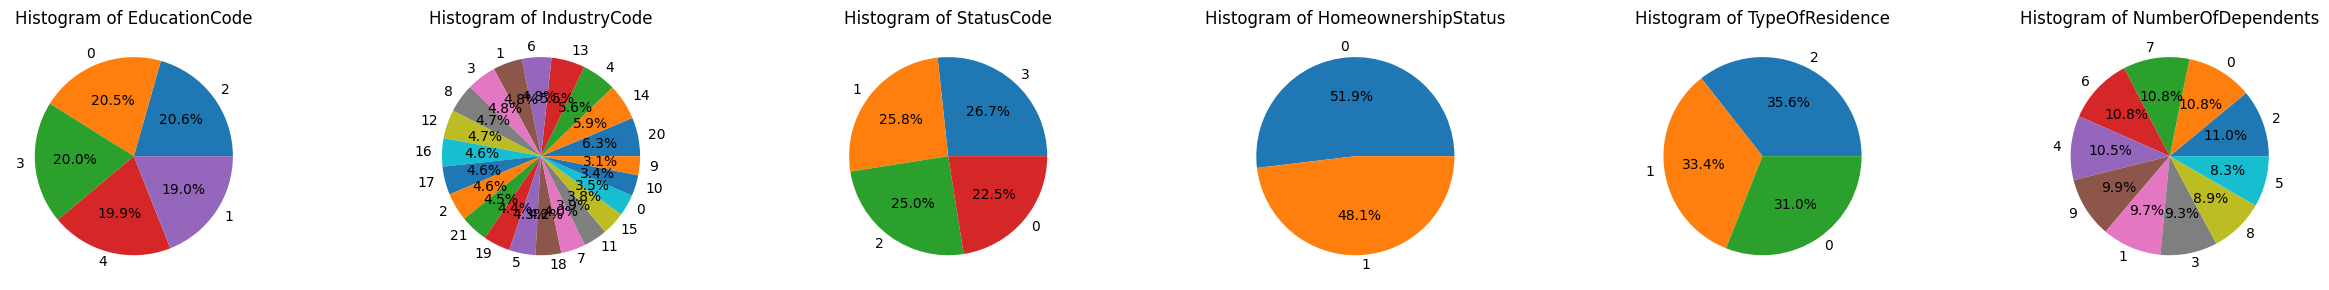

In [15]:
fig, axes = plt.subplots(1, train_Data.shape[1] - 2, figsize = (25, 3))

for plot_index, column in enumerate(train_Data.columns):
    if column == 'LAT':
        break
    value_counts = train_Data[column].value_counts()
    values = value_counts.values
    labels = list(value_counts.to_dict().keys())

    axes[plot_index].pie(values, labels = labels, autopct = '%1.1f%%')
    axes[plot_index].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

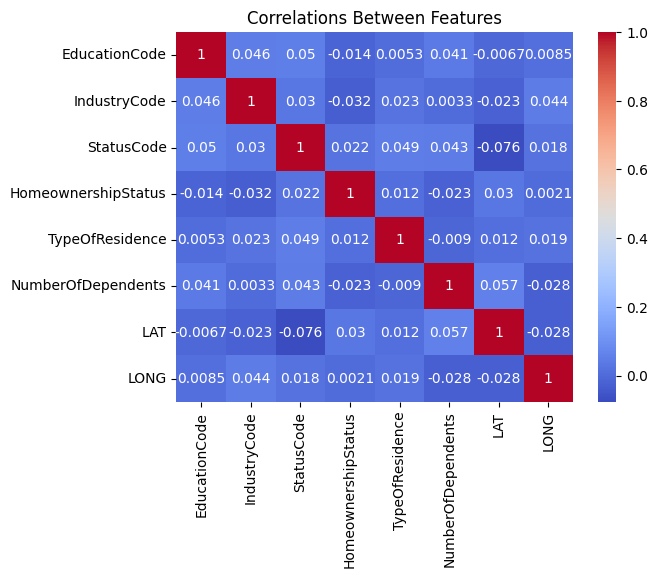

In [16]:
correlation_matrix = train_Data.corr()

sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Correlations Between Features")
plt.show()

In [17]:
kmeans = KMeans(n_clusters= 3)

clusters = kmeans.fit_predict(train_Data)
s_score = silhouette_score(train_Data, clusters)

test_clusters = kmeans.fit_predict(test_data)
test_s_score = silhouette_score(test_data, test_clusters)

print(f"Silhouette Score with train data: {s_score}")
print(f"Silhouette Score with test data: {test_s_score}")

Silhouette Score with train data: 0.3778499296803841
Silhouette Score with test data: 0.40185439863246186


In [23]:
with open("k_means_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)